# Assignment 2

### Due Date: February 5, 2021 by 12:59pm PST

#### Submission: Once done editing the notebook to answer the questions on the assignment sheet, download this notebook onto your local computer with the 'Notebook (.ipynb)' file format. Upload this file to bCourses.
General rule - if a cell asks to write some code, write the code below the comment within the same cell

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


In [6]:
# import yeast data

df = pd.read_csv("inputs/lab_02_data.txt", sep=",") # creating a data frame based on the text file input
df

,Time,Population
0,0.0,0.37
1,1.5,1.63
2,9.0,6.20
3,10.0,8.87
4,18.0,10.66
5,23.0,12.50
6,25.5,12.60
7,27.0,12.90
8,34.0,13.27
9,38.0,12.77


### Part 1

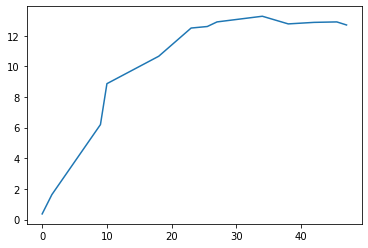

In [7]:
# plot the yeast data below using the 'plt.plot' function, shown in lab - figure out how to index the dataframe above, 
# using the column names, to pass as the x, y arguments to the function

plt.plot(df['Time'],df['Population'])

### Part 2

In [5]:
# enter your answer here #
# 12.5

### Part 3

In [23]:
# parameters - !!!ENTER the missing carrying capacity, estimated from Part 2!!!

t_span = [0,50] # range - we use [0,50] to more accurately compare to the real data we have, which spans t=0:50
y0 = [df["Population"][0]] # initial condition 
K = 12.5 # carrying capactiy - enter the carrying capacity you estimated in Part 2

In [25]:
# write a function below for the differential equation 
def logFun(t,N):
    dNdt = r*N*(1-N/K)
    return dNdt


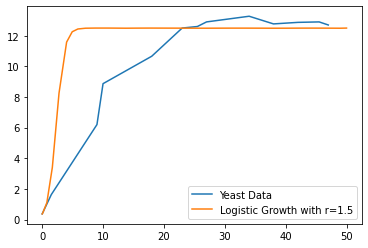

In [27]:
# solve using solve_ivp() for r = 1.5 below
# plot the solution on the same plot with the graph of the data (refer to the above plot)

r = 1.5 # reproductive factor

sol = solve_ivp(logFun, t_span, y0)
plt.plot("Time","Population", data = df)
plt.plot(sol.t, sol.y[0])# <---------input your line of code to plot the above solution in here between the other lines
plt.legend(["Yeast Data", "Logistic Growth with r=1.5"])
plt.show()

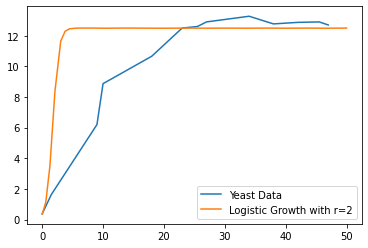

In [13]:
# solve using solve_ivp() for r = 2 below, and then plot the solution on the same plot with the graph of the data (refer to the above plot)

r = 2

sol = solve_ivp(logFun, t_span, y0)
plt.plot(df["Time"],df["Population"])
plt.plot(sol.t, sol.y[0])# <---------input your line of code to plot the above solution in here between the other lines
plt.legend(["Yeast Data", "Logistic Growth with r=2"])
plt.show()

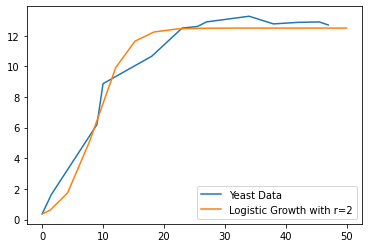

In [14]:
# solve using solve_ivp() for r = 0.4 below, and then plot the solution on the same plot with the graph of the data (refer to the above plot)

r = 0.4

sol = solve_ivp(logFun, t_span, y0)
plt.plot(df["Time"],df["Population"])
plt.plot(sol.t, sol.y[0])# <---------input your line of code to plot the above solution in here between the other lines
plt.legend(["Yeast Data", "Logistic Growth with r=2"])
plt.show()

In [22]:
# solve using solve_ivp() for r = 0.7 below, and then plot the solution on the same plot with the graph of the data (refer to the above plot)

r = 0.7

sol = solve_ivp(logFun, t_span, y0)
plt.plot(df["Time"],df["Population"])
plt.plot(sol.t, sol.y[0])# <---------input your line of code to plot the above solution in here between the other lines
plt.legend(["Yeast Data", "Logistic Growth with r=2"])
plt.show()

NameError: name 'logFun' is not defined

### Q. Which reproductive factor fits the data best? (Answer below)

In [16]:
# answer here
# r = 0.4

### Part 4

In [13]:
# edit your logistic growth function below to account for the daily harvest - give the function a new name

def myHarvest(t, N):
    dNdt = r*N*(1-N/K)-h
    return dNdt

### Part 5

In [10]:
# write a function below for the quadratic solutions (equilibria) of the harvest model 
## use the function 'sqrt' within the math' package to take the square root - make sure to import the package below
## refer to the assignment sheet for instructions on what exactly is expected from the function

import math as m
def quad(h, K, r):
    sQrt = r**2 - (4*r*h/K)
    h1 = (K/2)*((r+m.sqrt(sQrt))/r)
    h2 = (K/2)*((r-m.sqrt(sQrt))/r)
    H = [h1, h2]
    return H


### Part 6

In [28]:
# parameters - fill out any missing values

t_span = [0,100] # range 
y0 =  [12.5]# initial condition 
r = 0.4 # enter the reproductive factor you found to best fit the data
K = 13 # enter the carrying capacity corresponding to the initial condition above ^^
h = 1 # harvest amount -  edit this for Part 8 if needed

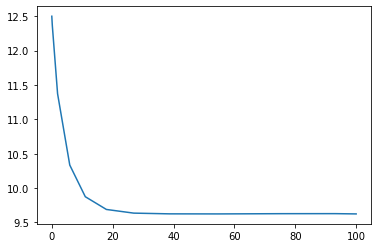

In [29]:
# solve using solve_ivp() below, and then plot the solution

sol = solve_ivp(myHarvest, t_span, y0)
plt.plot(sol.t, sol.y[0])
plt.show()

What about if we zoom out the y-axis?

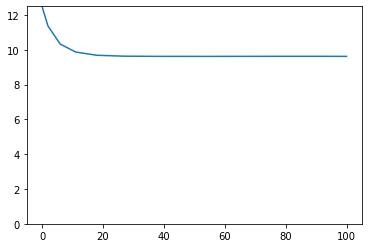

In [30]:
# plot the solution again, but edit the y-axis using the .ylim function, and set the range to be between 0 and 12.5

plt.plot(sol.t, sol.y[0])
plt.ylim(0,12.5)
plt.show()

In [31]:
# check the equilibria using the function you made in Part 6

val = quad(h, K, r)
print(val)

[9.622498999199202, 3.3775010008007995]


#### Discuss your answers below

In [ ]:
# The first equilibrium point from the quadratic equation matches the equilibrium point on the graph; the harvest 
# amount is sustainable.
# Next part didn't need to discuss:
    # Note that the second equilibrium point is not shown on the graph. This is because the second point is unstable.